# <center>“Attractiveness: What can we learn from algorithms?” </center>
#### <center> Computer Vision</center>
#### <center> Faculdade de Ciências da Universidade do Porto </center>
##### <center> December 2022</center>

<p
   style='text-align: center;'>
<br>
Nuno Fernandes (up202109069)
</p>

In [1]:
#import libraries
import pandas as pd
import seaborn as sns

import helper


In [ ]:
len(helper.X_train)

In [ ]:
len(helper.X_val)

In [ ]:
len(helper.X_test)

# Selecting the best model

In [ ]:
#Initially, models were trained only on the SCUTF-FB5500
import tensorflow as tf
models1 = {
        'InceptionResNetV2': tf.keras.applications.InceptionResNetV2(include_top=False, pooling='avg', weights='imagenet'),

        'MobileNetV2': tf.keras.applications.MobileNetV2(include_top=False, pooling='avg', weights='imagenet'),

        'EfficientNetV2B0': tf.keras.applications.EfficientNetV2B0(include_top=False, pooling='avg', weights='imagenet'),

        'ResNet50': tf.keras.applications.ResNet50(include_top=False, pooling='avg', weights='imagenet'),

        'VGG19': tf.keras.applications.VGG19(include_top=False, pooling='avg', weights='imagenet'),

        'Xception': tf.keras.applications.Xception(include_top=False, pooling='avg', weights='imagenet'),
}

pipe = helper.models_fit(models1)

In [ ]:
import keras
a = pipe.fit(epochs=100,verbose=1)

In [ ]:
pipe.metrics()

In [ ]:
pipe.predict()

In [ ]:
#The 2 best models were trained using 4 datasets (SCUT-FBP5500,CFD, KDEF, FACES)
import tensorflow as tf
models2 = {
        'InceptionResNetV2_ALL': tf.keras.applications.InceptionResNetV2(include_top=False, pooling='avg', weights='imagenet'),

        'VGG19_ALL': tf.keras.applications.VGG19(include_top=False, pooling='avg', weights='imagenet')
}


pipe2 = helper.models_fit(models2)

In [ ]:
#v2
#The 2 best models were trained using 4 datasets (SCUT-FBP5500,CFD, KDEF, FACES)
import tensorflow as tf

models2 = {
    'VGG19_ALL': tf.keras.applications.VGG19(include_top=False, pooling='avg', weights='imagenet')
}

#pipe2 = helper.models_fit(models2)

In [ ]:
from keras.models import load_model
vgg19 = load_model("VGG19_ALL.hdf5")

In [ ]:
vgg19.summary()

In [ ]:
predictions = vgg19.predict(helper.X_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')
helper.regression_plot(predictions,helper.y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
import keras
b = pipe2.fit(epochs=100,verbose=1)

In [ ]:
pipe2.metrics()

# (Not)Fine-tuning VGG-19
#VGG19_ALL_3_trained_fine_tuned.hdf5"

In [ ]:
from keras.models import load_model
model = load_model("VGG19_ALL_3_trained.hdf5")

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
vgg =  tf.keras.applications.VGG19(include_top=True, weights='imagenet')

In [ ]:
import keras
model = keras.models.Sequential()

In [ ]:
for i in vgg.layers[:-1]:
    model.add(i)

In [ ]:
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.summary()

In [ ]:
for layers in model.layers[:-3]:
    layers.trainable = False

In [ ]:
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
#emotions balanced
checkpointer = ModelCheckpoint(filepath="VGG19_ALL_3_v2" + ".hdf5"
                                   , monitor="val_loss", verbose=1
                                   , save_best_only=True, mode='auto'
                                   )

earlyStop = EarlyStopping(monitor='val_loss', patience=30)

history = model.fit(helper.X_train, helper.y_train, epochs=100
                        , validation_data=(helper.X_val, helper.y_val), callbacks=[checkpointer, earlyStop],verbose = 1
                        )

In [ ]:
predictions = model.predict(helper.X_test)

In [ ]:
#3fc-layers
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from sklearn.metrics import mean_squared_error

print(pearsonr(helper.y_test, predictions))
print(mae(helper.y_test, predictions))
print(sqrt(mean_squared_error(helper.y_test, predictions)))

In [ ]:
#3fc-layers
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from sklearn.metrics import mean_squared_error
print(pearsonr(helper.y_test, predictions))
print(mae(helper.y_test, predictions))
print(sqrt(mean_squared_error(helper.y_test, predictions)))

In [ ]:
from keras.models import load_model
model = load_model("VGG19_ALL_3_v2.hdf5")

In [ ]:
for layers in model.layers:
    layers.trainable = True

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
import tensorflow as tf
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5))

checkpointer = ModelCheckpoint(filepath="VGG19_ALL_3_fine_tuned_v2" + ".hdf5"
                                   , monitor="val_loss", verbose=1
                                   , save_best_only=True, mode='auto'
                                   )

earlyStop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(helper.X_train, helper.y_train, epochs=10
                        , validation_data=(helper.X_val, helper.y_val), callbacks=[checkpointer, earlyStop],verbose = 1
                        )

In [48]:
from keras.models import load_model
model = load_model("VGG19_ALL_3_fine_tuned_v2.hdf5")

In [ ]:
predictions = model.predict(helper.X_test)

In [ ]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from sklearn.metrics import mean_squared_error

print(pearsonr(helper.y_test, predictions))
print(mae(helper.y_test, predictions))
print(sqrt(mean_squared_error(helper.y_test, predictions)))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')
helper.regression_plot(predictions,helper.y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Using VGG-19 (fine-tuned) for predictions

## Dimorphism

### Example of transformations

In [ ]:
from IPython.display import Image, display

listOfImageNames= ["male_transformation.png","female_transformation.png"]

for imageName in listOfImageNames:
    display(Image(filename=imageName))

### Predicting

In [1]:
models = {
        'VGG19_ALL_3_fine_tuned_v2':[]
}

In [ ]:
m_f = helper.MasculinizedFeminized(models)

In [ ]:
males = m_f.predictions()

In [ ]:
m_f = helper.MasculinizedFeminized(models)

In [ ]:
females = m_f.predictions()

In [ ]:
pred = pd.concat([males,females])

In [105]:
predicted = np.array(females["mean_predictions"])

In [106]:
predicted = [i for i in predicted]

In [118]:
observed = pd.read_csv(r"C:\Users\nunok\PycharmProjects\pythonProject2\FRL_London\_ratings.csv")

In [119]:
observed = np.array(observed.iloc[:,3:].mean())

In [100]:
predicted = [round(i,1) for i in predicted]

In [120]:
observed = [i/7 for i in observed]

In [122]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from sklearn.metrics import mean_squared_error

print(pearsonr(predicted, observed))
#print(mae(helper.y_test, predictions))
#print(sqrt(mean_squared_error(helper.y_test, predictions)))

PearsonRResult(statistic=0.5359730353717433, pvalue=6.427664702792714e-09)


### Preprocessing

In [ ]:
def parsing(x):
        new = ""
        for i in x:
                if ord(i) < ord("a") or ord(i) > ord("z"):
                        new+=i
                else:
                        break
        return new

def parsing_congruent(x):
        new = ""
        if x in ["11","00"]:
                new = "yes"
        else:
                new = "no"
        return new

pred["parse"] = pred["file"].apply(parsing)
pred["congruent2"] = pred["congruent"].apply(parsing_congruent)

In [ ]:
pred["sym"] = "yes"
pred

In [ ]:
#non-symmetrized versions
pred.groupby(['gender','congruent2'])['mean_predictions'].agg(['mean', 'std']).round(2)

In [ ]:
pred.to_csv("symmetrized_m_f.csv")

In [ ]:
#symmetrized versions
pred.groupby(['gender','congruent2'])['mean_predictions'].agg(['mean', 'std']).round(2)

In [ ]:
def parsing_congruent(x):
        new = ""
        if x== "yes":
                new = "congruent"
        else:
                new = "non_congruent"
        return new

pred["condition"] = pred["congruent2"].apply(parsing_congruent)

In [ ]:
#non-symmetrized

## Original Faces

### Predicting

In [ ]:
sym = helper.sym(models)
female_sym = sym.predictions()

In [ ]:
sym = helper.sym(models)
male_sym = sym.predictions()

In [ ]:
df_sym = pd.concat([male_sym,female_sym])

### Preprocessing

In [ ]:
df_sym["parse"] = df_sym["file"].apply(parsing)

In [ ]:
def parsing_sym(x):
        new = ""
        if x== "yes":
                new = "sym"
        else:
                new = "original"
        return new

df_sym["condition"] = df_sym["sym"].apply(parsing_sym)

In [ ]:
def _(x):
    return x[:-1]+"_"
df_sym["parse"] = df_sym["parse"].apply(_)

In [ ]:
df_sym["congruent2"] = "original"
df_sym

In [ ]:
df_sym.groupby(['gender','sym'])['mean_predictions'].agg(['mean', 'std']).round(2)

In [ ]:
df_sym.to_csv("sym_original.csv")

## Symmetrized versions

### Example of symmetrized versions

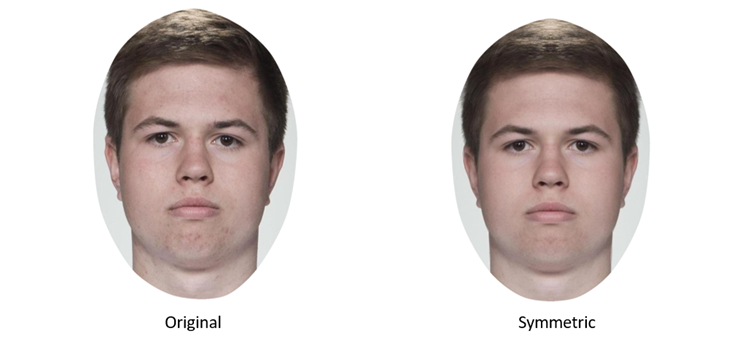

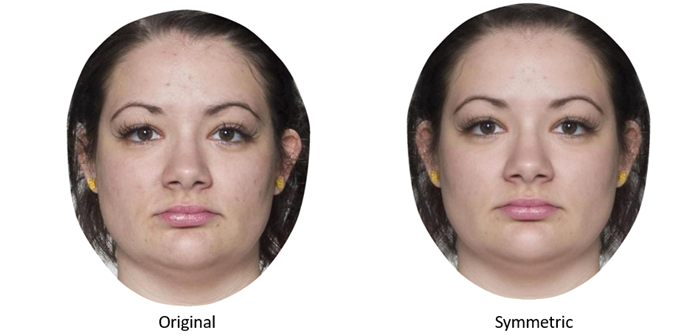

In [124]:
from IPython.display import Image, display

listOfImageNames= ["sym_male.png","sym_female.png"]

for imageName in listOfImageNames:
    display(Image(filename=imageName))

### Predicting

### Preprocessing

In [ ]:
df_sym

In [ ]:
all = pd.concat([pred,df_sym,df_sym])

In [ ]:
def parsing(x):
        new = ""
        for i in x:
                if ord(i) < ord("a") or ord(i) > ord("z"):
                        new+=i
                else:
                        break
        return new[:-1]

all["parse"] = all["file"].apply(parsing)

In [ ]:
#all.to_csv("all.csv")

In [ ]:
all = pd.read_csv("all.csv")

# Inferential Analysis

In [4]:
df_sym_m_f = pd.read_csv("symmetrized_m_f.csv")
df_non_sym_m_f = pd.read_csv("non_symmetrized_m_f.csv")
df_sym_orig = pd.read_csv("sym_original.csv")

df = pd.concat([df_sym_m_f,df_non_sym_m_f,df_sym_orig])

In [5]:
df

,Unnamed: 0,file,gender,congruent,exact_file,pixels,VGG19_ALL_3_fine_tuned_v2,mean_predictions,parse,congruent2,sym,condition
0,0,004_03_feminized.jpg,male,10.0,C:\Users\nunok\PycharmProjects\pythonProject2\...,[254. 254. 254. ... 254. 254. 254.],0.489356,0.489356,004_03_,no,yes,NaN
1,1,004_03_masc.jpg,male,11.0,C:\Users\nunok\PycharmProjects\pythonProject2\...,[254. 254. 254. ... 254. 254. 254.],0.473985,0.473985,004_03_,yes,yes,NaN
2,2,008_03_feminized.jpg,male,10.0,C:\Users\nunok\PycharmProjects\pythonProject2\...,[254. 254. 254. ... 254. 254. 254.],0.475254,0.475254,008_03_,no,yes,NaN
3,3,008_03_masc.jpg,male,11.0,C:\Users\nunok\PycharmProjects\pythonProject2\...,[254. 254. 254. ... 254. 254. 254.],0.469127,0.469127,008_03_,yes,yes,NaN
4,4,012_03_feminized.jpg,male,10.0,C:\Users\nunok\PycharmProjects\pythonProject2\...,[254. 254. 254. ... 254. 254. 254.],0.556329,0.556329,012_03_,no,yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
195,95,136_03_sym.jpg,female,NaN,C:\Users\nunok\PycharmProjects\pythonProject2\...,[255. 255. 255. ... 255. 255. 255.],0.486784,0.486784,136_03_,original,yes,sym
196,96,139_03.jpg,female,NaN,C:\Users\nunok\PycharmProjects\pythonProject2\...,[255. 255. 255. ... 255. 255. 255.],0.541422,0.541422,139_03_,original,no,original
197,97,139_03_sym.jpg,female,NaN,C:\Users\nunok\PycharmProjects\pythonProject2\...,[255. 255. 255. ... 255. 255. 255.],0.506126,0.506126,139_03_,original,yes,sym
198,98,144_03.jpg,female,NaN,C:\Users\nunok\PycharmProjects\pythonProject2\...,[255. 255. 255. ... 255. 255. 255.],0.487181,0.487181,144_03_,original,no,original


In [ ]:
len(df)

In [6]:
#parse congruent to masculinized-feminized
new = []
for index in range(len(df)):
    if df.iloc[index, 2] == "male" and df.iloc[index,9] == "no":
        new.append("feminized")
    elif df.iloc[index, 2] == "male" and df.iloc[index,9] == "yes":
        new.append("masculinized")
    elif df.iloc[index, 2] == "female" and df.iloc[index,9] == "yes":
        new.append("feminized")
    elif df.iloc[index, 2] == "female" and df.iloc[index,9] == "no":
        new.append("masculinized")

    else:
        new.append("original")

df["congruent"] = new

In [9]:
df.to_csv("datable_R.csv")

### Non-symmetrized

### Visualization

In [ ]:
non = df[df["sym"].isin(["no"])]
sym = df[df["sym"].isin(["yes"])]

In [ ]:
import matplotlib.pyplot as plt
sns.set_style(style='white')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.pointplot(data=non, x='gender', y='VGG19_ALL_3_fine_tuned_v2', hue='congruent', dodge=True, markers=['o', 's', 'x'],
	      capsize=.1, errwidth=1, palette='colorblind',ax = ax1)

ax1.set(ylim=(0.45, 0.56))

sns.pointplot(data=sym, x='gender', y='VGG19_ALL_3_fine_tuned_v2', hue='congruent', dodge=True, markers=['o', 's', 'x'],
	      capsize=.1, errwidth=1, palette='colorblind', ax = ax2)
ax2.set(ylim=(0.45, 0.56))

plt.setp(ax1, xlabel="Sex")
plt.setp(ax2, xlabel="Sex")

plt.setp(ax1, ylabel="Predicted Attractiveness")
ax2.set(ylabel=None)

ax1.set_title('Non-Symmetrized')
ax2.set_title('Symmetrized')

ax1.get_legend().remove()
ax2.legend(title = "Condition",loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylabel("Predicted Attractiveness")
#plt.xlabel("Sex")

#####SAME SCALE; REMOVE AX1 BOX; LEGEND; TITLE

In [ ]:
#Percent of Choices where attractiveness for the feminized version was higher than masculinized version
helper.acc(pred,5,"dim")[0]

In [ ]:
df_sym_m_f = df_sym_m_f.drop('Unnamed: 0', axis=1)

In [ ]:
condition = []
for i in range(len(df_sym_m_f)):
    if df_sym_m_f.iloc[i,8] == "no":
        condition.append("non_congruent")
    else:
        condition.append("congruent")
df_sym_m_f["condition"] = condition

In [ ]:
helper.acc(df_sym_m_f,5,"dim")[0]

In [ ]:
df_non_sym_m_f = df_non_sym_m_f.drop('Unnamed: 0', axis=1)

In [ ]:
condition = []
for i in range(len(df_non_sym_m_f)):
    if df_non_sym_m_f.iloc[i,8] == "no":
        condition.append("non_congruent")
    else:
        condition.append("congruent")
df_non_sym_m_f["condition"] = condition

In [ ]:
helper.acc(df_non_sym_m_f,5,"dim")[0]

### ANOVA

In [ ]:
### NON-Symmetrized

In [ ]:
dim_non = df[df["sym"]=="no"]

In [ ]:
# Compute the two-way mixed ANOVA and export to a .csv file
import pingouin as pg
aov = pg.mixed_anova(data=dim_non, dv='mean_predictions', between='gender', within='congruent',
                     subject='parse', correction=False, effsize="np2")
pg.print_table(aov)

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions', between='gender', subject='parse', padjust='bonf', data=dim_non)
posthocs.round(3)

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions',within = "congruent", between = "gender", subject='parse', padjust='bonf', data=dim_non)
posthocs.round(3)

In [ ]:
#group by gender
dim_non_f = dim_non[dim_non["gender"] == "female"]

posthocs = pg.pairwise_tests(dv='mean_predictions',within = "congruent", subject='parse', padjust='bonf', data=dim_non_f)
posthocs.round(3)

In [ ]:
posthocs.round(3)
#group by gender
dim_non_m = dim_non[dim_non["gender"] == "male"]

posthocs = pg.pairwise_tests(dv='mean_predictions', within="congruent", subject='parse', padjust='bonf', data=dim_non_m)
posthocs.round(3)

In [ ]:
### Symmetrized

In [ ]:
dim = df[df["sym"]=="yes"]

In [ ]:
# Compute the two-way mixed ANOVA and export to a .csv file
import pingouin as pg
aov = pg.mixed_anova(data=dim, dv='mean_predictions', between='gender', within='congruent',
                     subject='parse', correction=False, effsize="np2")
pg.print_table(aov)

In [ ]:
#group by gender
dim_f = dim[dim["gender"] == "female"]

posthocs = pg.pairwise_tests(dv='mean_predictions',within = "congruent", subject='parse', padjust='bonf', data=dim_f)
posthocs.round(3)

In [ ]:
posthocs.round(3)
#group by gender
dim_m = dim[dim["gender"] == "male"]

posthocs = pg.pairwise_tests(dv='mean_predictions', within="congruent", subject='parse', padjust='bonf', data=dim_m)
posthocs.round(3)

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions',within = "sym",between = "congruent", subject='parse', padjust='bonf', data=df)
posthocs.round(3)

In [ ]:
# Perform Tukey's HSD test
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['mean_predictions'], df['gender'])
tukey_result = mc.tukeyhsd()

# Print the results
print(tukey_result)

In [ ]:
mc = MultiComparison(df['mean_predictions'], df['congruent'])
tukey_result = mc.tukeyhsd()

# Print the results
print(tukey_result)

In [ ]:
mc = MultiComparison(df['mean_predictions'], df['sym'])
tukey_result = mc.tukeyhsd()

# Print the results
print(tukey_result)

In [ ]:
# Sym

In [ ]:
# Compute the two-way mixed ANOVA and export to a .csv file

from pingouin import rm_anova
aov = rm_anova(dv='mean_predictions', within='sym',data=df, subject="parse",correction='auto', detailed=True)
pg.print_table(aov)

In [ ]:
dim_m = df[df["gender"] == "male"]
posthocs = pg.pairwise_tests(dv='mean_predictions', within=["congruent","sym"],subject='parse', padjust='bonf',
                             data=dim_m)
posthocs.round(3)

In [ ]:
dim_f = df[df["gender"] == "female"]
posthocs = pg.pairwise_tests(dv='mean_predictions', within=["congruent", "sym"], subject='parse', padjust='bonf',
                             data=dim_f)
posthocs.round(3)

In [ ]:
dim_m

### Post-hocs

In [ ]:
dim_male = dim[dim["gender"] == "male"]

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions', within='condition', subject='parse', padjust='bonf', data=dim_male)
posthocs.round(3)

In [ ]:
dim_female = dim[dim["gender"] == "female"]

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions', within='condition', subject='parse', padjust='bonf', data=dim_female)
posthocs.round(3)

# 50% Symmetrized

In [ ]:
m_f = helper.MasculinizedFeminized(models)

In [ ]:
males = m_f.predictions()

In [ ]:
m_f = helper.MasculinizedFeminized(models)

In [ ]:
females = m_f.predictions()

In [ ]:
pred = pd.concat([males,females])

In [ ]:
def parsing(x):
        new = ""
        for i in x:
                if ord(i) < ord("a") or ord(i) > ord("z"):
                        new+=i
                else:
                        break
        return new

def parsing_congruent(x):
        new = ""
        if x in ["11","00"]:
                new = "yes"
        else:
                new = "no"
        return new

pred["parse"] = pred["file"].apply(parsing)
pred["congruent2"] = pred["congruent"].apply(parsing_congruent)

In [ ]:
pred

In [ ]:
pred.groupby(['gender','congruent2'])['mean_predictions'].agg(['mean', 'std']).round(2)

# 30%

In [ ]:
import seaborn as sns
sns.set_style(style='white')
g = sns.pointplot(data=dim, x='gender', y='VGG19_ALL_3_trained_fine_tuned', hue='condition', dodge=True, markers=['o', 's', 'x'],
	      capsize=.1, errwidth=1, palette='colorblind')

plt.ylabel("Predicted Attractiveness")
plt.xlabel("Sex")



In [ ]:
#Percent of Choices where attractiveness for the feminized version was higher than masculinized version
helper.acc(pred,5,"dim")[0]

In [ ]:
# Compute the two-way mixed ANOVA and export to a .csv file
import pingouin as pg
aov = pg.mixed_anova(data=dim, dv='mean_predictions', between='gender', within='condition',
                     subject='parse', correction=False, effsize="np2")
pg.print_table(aov)

In [ ]:
dim_male = dim[dim["gender"] == "male"]

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions', within='condition', subject='parse', padjust='bonf', data=dim_male)
posthocs.round(3)

In [ ]:
dim_female = dim[dim["gender"] == "female"]

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions', within='condition', subject='parse', padjust='bonf', data=dim_female)
posthocs.round(3)

In [ ]:
pred.groupby(['gender','congruent2'])['mean_predictions'].agg(['mean', 'std']).round(2)

# 15%

In [ ]:
pred.groupby(['gender','congruent2'])['mean_predictions'].agg(['mean', 'std']).round(2)

## Symmetric

In [ ]:
sym = all[all["condition"].isin(["sym","original"])]

### Visualization

In [ ]:
sns.set_style(style='white')
sns.pointplot(data=sym, x='gender', y='mean_predictions', hue='condition', dodge=True,markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

plt.ylabel("Predicted Attractiveness")
plt.xlabel("Sex")

In [ ]:
helper.acc(df_sym,5,"sym")[0]

### Inferential Analysis

In [ ]:
sym_male = sym[sym["gender"] == "male"]

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions', within='condition', subject='parse', padjust='bonf', data=sym_male)
posthocs.round(3)

In [ ]:
sym_female = sym[sym["gender"] == "female"]

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions', within='condition', subject='parse', padjust='bonf', data=sym_female)
posthocs.round(3)

## SYM Shape

In [ ]:
sym = all[all["condition"].isin(["sym","original"])]

In [ ]:
sns.set_style(style='white')
sns.pointplot(data=sym, x='gender', y='mean_predictions', hue='condition', dodge=True,markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

plt.ylabel("Predicted Attractiveness")
plt.xlabel("Sex")

In [ ]:
helper.acc(df_sym,5,"sym")[0]

In [ ]:
sym_male = sym[sym["gender"] == "male"]

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions', within='condition', subject='parse', padjust='bonf', data=sym_male)
posthocs.round(3)

In [ ]:
sym_female = sym[sym["gender"] == "female"]

In [ ]:
posthocs = pg.pairwise_tests(dv='mean_predictions', within='condition', subject='parse', padjust='bonf', data=sym_female)
posthocs.round(3)

In [ ]:
sym.groupby(['gender','condition'])['mean_predictions'].agg(['mean', 'std']).round(2)

https://keras.io/guides/transfer_learning/

https://www.kaggle.com/code/ihsncnkz/transfer-learning-with-keras-vgg16-vgg19

In [ ]:
#The 2 best models were trained using 4 datasets (SCUT-FBP5500,CFD, KDEF, FACES)
import helper
import tensorflow as tf
models = {
        'VGG19_ALL_3_trained': tf.keras.applications.VGG19(include_top=True, pooling='avg', weights='imagenet')
}

pipe2 = helper.models_fit(models)

In [ ]:
c = pipe2.fit(epochs=100,verbose=1)

Fine-tuning

In [ ]:
import tensorflow as tf
models = {
        'VGG19_ALL_3_trained': tf.keras.applications.VGG19(include_top=True, pooling='avg', weights='imagenet'),

        'VGG19_ALL': tf.keras.applications.VGG19(include_top=False, pooling='avg', weights='imagenet')

}

#pipe2 = helper.models_fit(models)

In [ ]:
helper.X_test

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')
helper.regression_plot(predictions,helper.y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# GRAD-CAM ALG
https://keras.io/examples/vision/grad_cam/

In [28]:
#import helper
features = helper.features_prediction_sym()

In [3]:
from GradCAM import GradCAM
import imutils
import cv2
import numpy as np

In [29]:
# display the original image and resulting heatmap and output image
orig = cv2.imread(r"C:\Users\nunok\PycharmProjects\pythonProject2\predict\female\004_03.jpg")
# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model,0,"block5_conv4")
heatmap = cam.compute_heatmap(features)
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

In [ ]:
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, "person", (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	0.8, (255, 255, 255), 2)
#resized = cv2.resize(orig, (224, 224))
# to our screen
output = np.vstack([orig, heatmap, output])
output = imutils.resize(output, height=700)
cv2.imshow("Output", output)
cv2.waitKey(0)

keras implementation


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [30]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

1/1 [==============================] - 0s 188ms/step


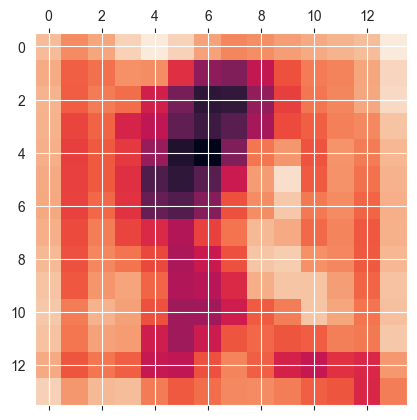

In [31]:
# Prepare image
#img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
#model = model_builder(weights="imagenet")

# Remove last layer's softmax
#model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(features)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(features, model, "block5_conv4")

# Display heatmap
plt.matshow(heatmap)
plt.show()

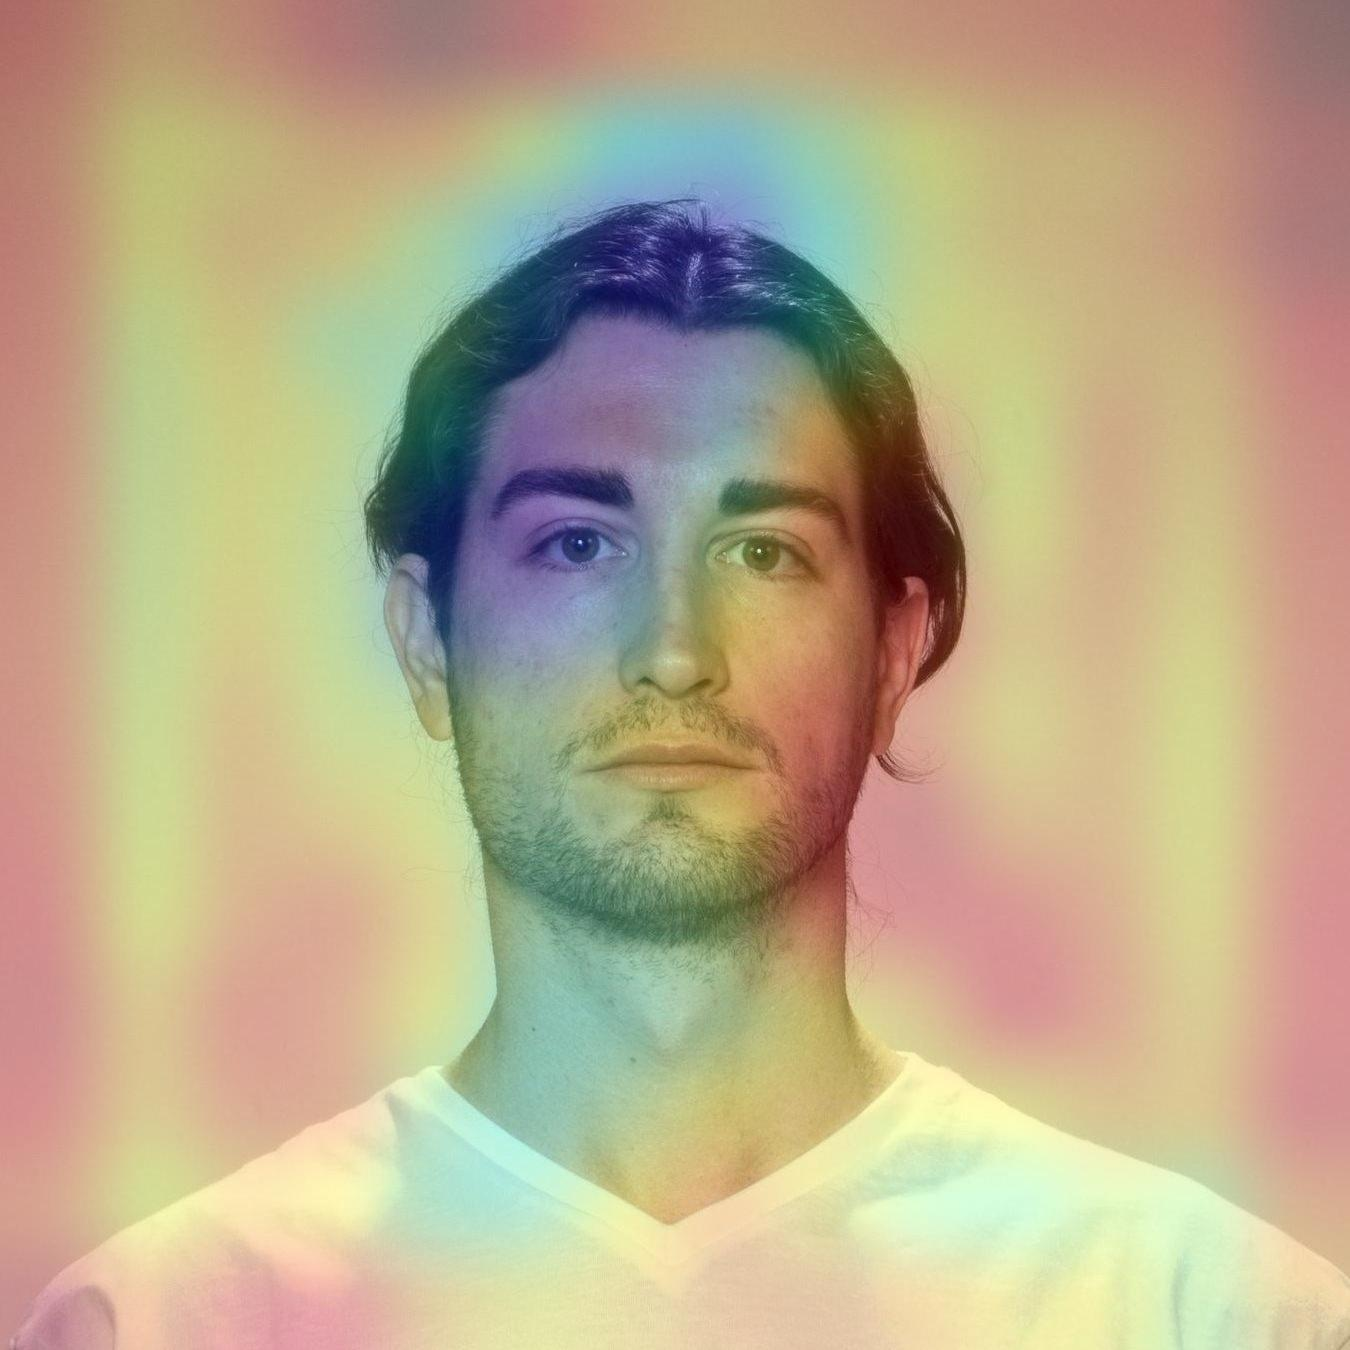

In [32]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(r"C:\Users\nunok\PycharmProjects\pythonProject2\predict\female\004_03.jpg", heatmap)

# SYM

In [ ]:
sym = helper.sym(models)
female_sym = sym.predictions()

In [ ]:
sym = helper.sym(models)
male_sym = sym.predictions()

In [ ]:
df_sym = pd.concat([male_sym,female_sym])

In [ ]:
def parsing(x):
        new = ""
        for i in x:
                if ord(i) < ord("a") or ord(i) > ord("z"):
                        new+=i
                else:
                        break
        return new

In [ ]:
df_sym["parse"] = df_sym["file"].apply(parsing)

In [ ]:
df_sym

In [ ]:
import seaborn as sns
sns.set_style(style='white')
sns.pointplot(data=df_sym, x='gender', y='VGG19_ALL_3_trained_fine_tuned', hue='sym', dodge=True,markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

plt.ylabel("Predicted Attractiveness")
plt.xlabel("Sex")

In [ ]:
def acc(df, column, condition):

    dici = {'male': 0, 'female': 0}
    confusion = {'male': [], 'female': []}
    for key, value in dici.items():
        temp = df[df["gender"] == key]

        ele = 0
        soma = 0

        for index in range(len(temp)):

            # print(index)
            # se for par atualiza
            if index % 2 == 0:

                ele = temp.iloc[index, column]

            # impar compara
            else:
                # print(ele,temp.iloc[index,column])
                if temp.iloc[index, column] > ele and condition == "dim":
                    soma += 1
                    confusion[key].append(1)
                    # print(temp.iloc[index,2])


                elif temp.iloc[index, column] <= ele and condition == "dim":
                    confusion[key].append(0)


                elif temp.iloc[index, column] < ele and condition != "dim":
                    soma += 1
                    confusion[key].append(1)

                elif temp.iloc[index, column] >= ele and condition != "dim":
                    confusion[key].append(1)

        dici[key] = 1 - (soma / len(temp))

    results = [dici, confusion]

    return results

acc(df_sym,5,"sym")

# ADD A BLOCK OF CONVOLUTIONAL LAYERS

In [ ]:
import tensorflow as tf
vgg =  tf.keras.applications.VGG19(include_top=True, weights='imagenet')

In [ ]:
vgg.summary()

In [ ]:
import keras
model = keras.models.Sequential()

In [ ]:
for i in vgg.layers[:-4]:
    model.add(i)

In [ ]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.summary()

In [ ]:
for layer in model.layers[:-9]:
    layer.trainable = False

In [ ]:
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

checkpointer = ModelCheckpoint(filepath="VGG19_ALL_3block" + ".hdf5"
                                   , monitor="val_loss", verbose=1
                                   , save_best_only=True, mode='auto'
                                   )

earlyStop = EarlyStopping(monitor='val_loss', patience=30
                          )

history = model.fit(helper.X_train, helper.y_train, epochs=100
                        , validation_data=(helper.X_val, helper.y_val), callbacks=[checkpointer, earlyStop],verbose = 1
                        )

In [ ]:
from keras.models import load_model
model = load_model("VGG19_ALL_3block.hdf5")

In [7]:
from keras.models import load_model
model = load_model("VGG19_ALL_3_fine_tuned_v2.hdf5")

In [ ]:
model.evaluate(helper.X_test,helper.y_test)